# EC7212 – Computer Vision and Image Processing #
## Take Home Assignment 1 ##

In [52]:
# Import Libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### 1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

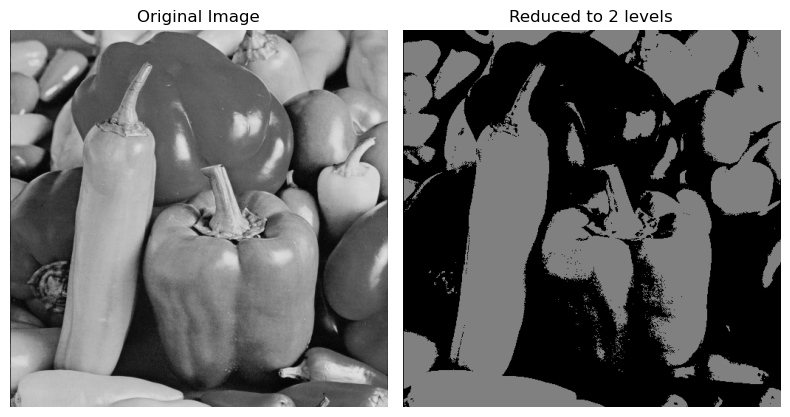

In [53]:
# reduce_intensity function
def reduce_intensity(img, levels):
    """Reduce intensity levels to given power-of-2 value"""
    if levels not in [2, 4, 8, 16, 32, 64, 128, 256]:
        raise ValueError("Intensity levels must be a power of 2 between 2 and 256.")
    factor = 256 // levels
    return np.floor(img / factor).astype(np.uint8) * factor

# Input file path
IMAGE_PATH = 'PeppersGray.png'

# Check if file exists
if not os.path.exists(IMAGE_PATH):
    print("Image file not found:", IMAGE_PATH)
else:
    # Load the image 
    color_img_bgr = cv2.imread(IMAGE_PATH)
    if color_img_bgr is None:
        print("Failed to load image. Check the format or path.")
    else:
        # Convert BGR to RGB for matplotlib display
        color_img_rgb = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

        
        try:
            # Define the intensity level
            level = 2      # Enter values (2, 4, 8, 16, 32, 64, 256)
            reduced_img = reduce_intensity(color_img_rgb, level)

            # Original image
            plt.figure(figsize=(8, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(color_img_rgb)
            plt.title("Original Image")
            plt.axis('off')

            # Reduced image
            plt.subplot(1, 2, 2)
            plt.imshow(reduced_img)
            plt.title(f"Reduced to {levels} levels")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        except ValueError:
            print("Invalid input. Please enter a power-of-2 value (2, 4, ..., 256).")


### 2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood

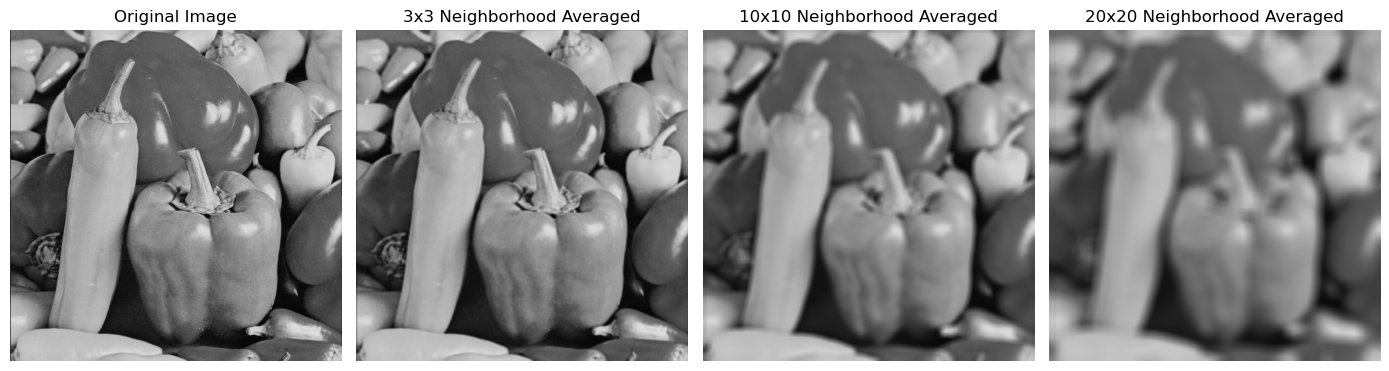

In [54]:
# Load image path
IMAGE_PATH = "PeppersGray.png"  

def neighborhood_averaging(img, filter_size):
    """Apply mean filter of given size (e.g., 3x3, 10x10)"""
    return cv2.blur(img, (filter_size, filter_size))

# Check if image exists
if not os.path.exists(IMAGE_PATH):
    print(f"Image file not found: {IMAGE_PATH}")
else:
    # Load image using OpenCV
    color_img_bgr = cv2.imread(IMAGE_PATH)
    if color_img_bgr is None:
        print("Failed to load image. Check format or path.")
    else:
        # Convert to RGB for matplotlib
        color_img_rgb = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

        # Apply 3x3, 10x10, 20x20 averaging
        img_avg_3 = neighborhood_averaging(color_img_rgb, 3)
        img_avg_10 = neighborhood_averaging(color_img_rgb, 10)
        img_avg_20 = neighborhood_averaging(color_img_rgb, 20)

        # Plotting
        fig = plt.figure(figsize=(14, 12))

        img1 = fig.add_subplot(1, 4, 1)
        img1.imshow(color_img_rgb)
        img1.set_title("Original Image")
        img1.axis('off')

        img2 = fig.add_subplot(1, 4, 2)
        img2.imshow(img_avg_3)
        img2.set_title("3x3 Neighborhood Averaged")
        img2.axis('off')

        img3 = fig.add_subplot(1, 4, 3)
        img3.imshow(img_avg_10)
        img3.set_title("10x10 Neighborhood Averaged")
        img3.axis('off')

        img4 = fig.add_subplot(1, 4, 4)
        img4.imshow(img_avg_20)
        img4.set_title("20x20 Neighborhood Averaged")
        img4.axis('off')

        plt.tight_layout()
        plt.show()


### 3. Rotate an image by 45 and 90 degrees.

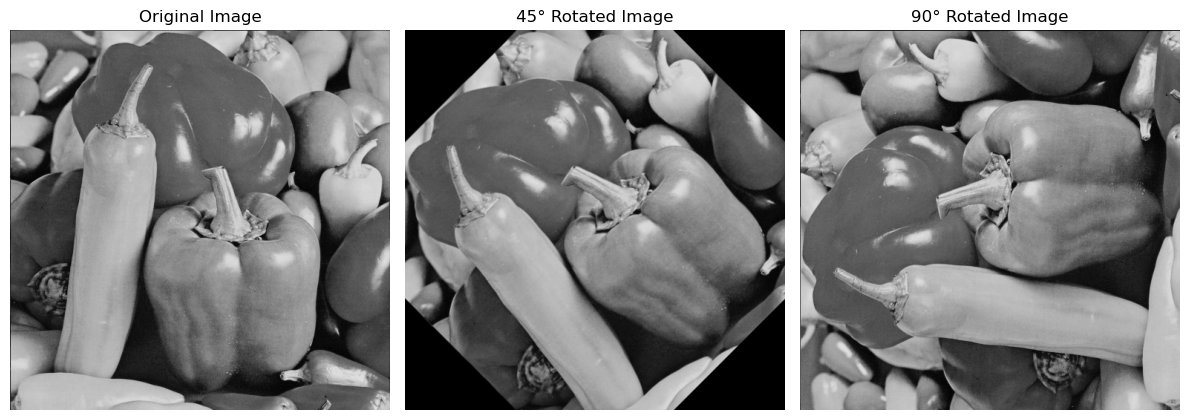

In [55]:
# Load image path
IMAGE_PATH = "PeppersGray.png" 

def image_rotate(img, angle):
    """Rotates the image by the specified angle (in degrees)"""
    rows, cols, _ = img.shape
    rotation_matrix = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=angle, scale=1)
    rotated = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated

# Check if image exists
if not os.path.exists(IMAGE_PATH):
    print(f"Image file not found: {IMAGE_PATH}")
else:
    # Load the image using OpenCV
    color_img_bgr = cv2.imread(IMAGE_PATH)
    if color_img_bgr is None:
        print("Failed to load image. Check the file format or path.")
    else:
        # Convert BGR to RGB 
        color_img_rgb = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

        # Rotate the image
        rotated_45 = image_rotate(color_img_rgb, 45)
        rotated_90 = image_rotate(color_img_rgb, 90)

        # Display all images
        fig = plt.figure(figsize=(12,10))

        img1 = fig.add_subplot(1, 3, 1)
        img1.imshow(color_img_rgb)
        img1.set_title("Original Image")
        img1.axis('off')

        img2 = fig.add_subplot(1, 3, 2)
        img2.imshow(rotated_45)
        img2.set_title("45° Rotated Image")
        img2.axis('off')

        img3 = fig.add_subplot(1, 3, 3)
        img3.imshow(rotated_90)
        img3.set_title("90° Rotated Image")
        img3.axis('off')

        plt.tight_layout()
        plt.show()


###  4. For every 3×3 block of the image (without overlapping), replace all the corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks

Shrunk size (3x3 blocks): (170, 170, 3)
Re-enlarged size: (510, 510, 3)


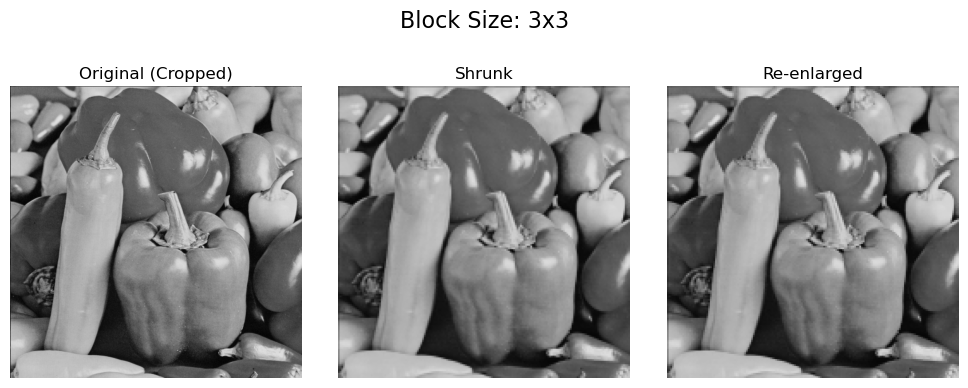

Shrunk size (5x5 blocks): (102, 102, 3)
Re-enlarged size: (510, 510, 3)


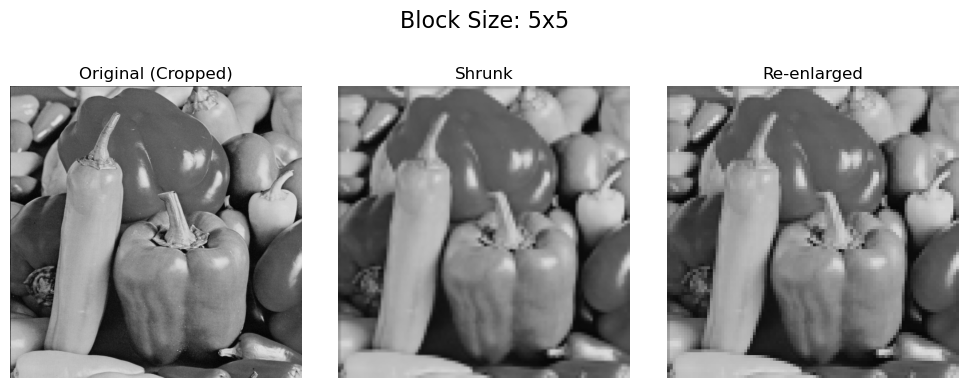

Shrunk size (7x7 blocks): (73, 73, 3)
Re-enlarged size: (511, 511, 3)


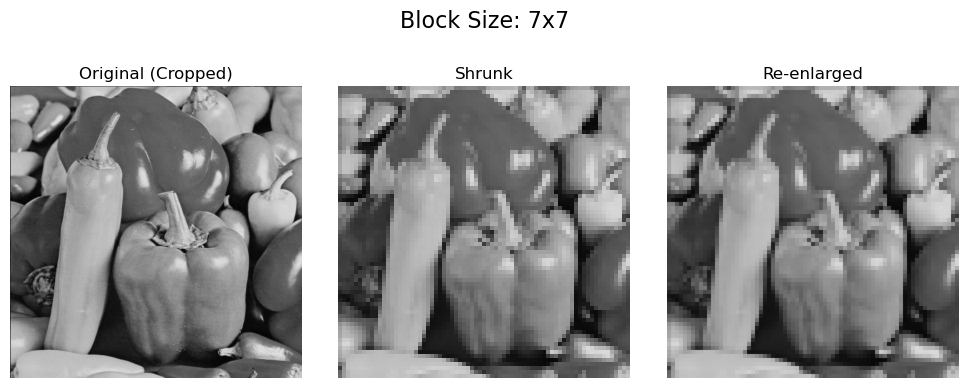

In [56]:
# Path to your PNG image
IMAGE_PATH = "PeppersGray.png"  

def shrink_resolution(img, factor):
    """
    Reduces spatial resolution by downsampling and upsampling.
    Shrink using INTER_AREA (good for shrinking), then enlarge to original size.
    """
    height, width = img.shape[:2]

    # Ensure dimensions are divisible by the factor for perfect blocks
    new_width = width - (width % factor)
    new_height = height - (height % factor)
    img_cropped = img[:new_height, :new_width]

    # Shrink (downsample)
    shrunk = cv2.resize(img_cropped, (new_width // factor, new_height // factor), interpolation=cv2.INTER_AREA)

    print(f"Shrunk size ({factor}x{factor} blocks): {shrunk.shape}")

    # Re-enlarge (upsample)
    re_enlarged = cv2.resize(shrunk, (new_width, new_height), interpolation=cv2.INTER_AREA)
    print(f"Re-enlarged size: {re_enlarged.shape}")

    return img_cropped, shrunk, re_enlarged

# Load and validate the image
if not os.path.exists(IMAGE_PATH):
    print(f"Image file not found: {IMAGE_PATH}")
else:
    # Load using OpenCV (BGR)
    color_img_bgr = cv2.imread(IMAGE_PATH)
    if color_img_bgr is None:
        print("Failed to load image.")
    else:
        # Convert to RGB 
        color_img_rgb = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

        # Choose block size (3x3, 5x5, 7x7)
        for block_size in [3, 5, 7]:
            original, shrunk, enlarged = shrink_resolution(color_img_rgb, block_size)

            # Plot results
            fig = plt.figure(figsize=(10, 8))
            fig.suptitle(f"Block Size: {block_size}x{block_size}", fontsize=16)

            ax1 = fig.add_subplot(1, 3, 1)
            ax1.imshow(original)
            ax1.set_title("Original (Cropped)")
            ax1.axis('off')

            ax2 = fig.add_subplot(1, 3, 2)
            ax2.imshow(shrunk)
            ax2.set_title("Shrunk")
            ax2.axis('off')

            ax3 = fig.add_subplot(1, 3, 3)
            ax3.imshow(enlarged)
            ax3.set_title("Re-enlarged")
            ax3.axis('off')

            plt.tight_layout(rect=[0, 0.5, 1, 0.95])  
            plt.show()
